In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2.csv')
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,6,1,1,1,1,1,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,2,1,1,1,1,1,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,2,1,0,1,1,0,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,2,1,0,1,1,0,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,5,1,1,1,1,1,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [41]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2p.csv')
data.head()

,Gender,Type_of_Family,Occupational_Status,Area_of_Residence,Transfusion_Status,Frequency_of_Blood_Transfusion,Splenectomy_Status,Comorbidities_Status,Ironchelating_Therapy_Status,Medical_Expense,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,0,2,1,1,0,0,0,3,0,180000,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,1,2,1,1,0,1,0,3,0,60000,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,0,2,1,0,0,1,0,3,0,96000,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,0,1,1,0,0,1,0,3,0,120000,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,1,2,1,1,0,0,1,3,0,150000,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [42]:

# Split features and target
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status']

# Display the encoded dataset
print(X)
print(y)

     Gender  Type_of_Family  Occupational_Status  Area_of_Residence  \
0         0               2                    1                  1   
1         1               2                    1                  1   
2         0               2                    1                  0   
3         0               1                    1                  0   
4         1               2                    1                  1   
..      ...             ...                  ...                ...   
351       0               0                    1                  0   
352       1               1                    1                  1   
353       0               2                    1                  1   
354       0               2                    1                  0   
355       0               2                    1                  0   

     Transfusion_Status  Frequency_of_Blood_Transfusion  Splenectomy_Status  \
0                     0                               0             

In [47]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=14f51412417f25d8fbb75bec555fbd1ac4de26bc821bf3dacae9e9b48759c182
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 321, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2150
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

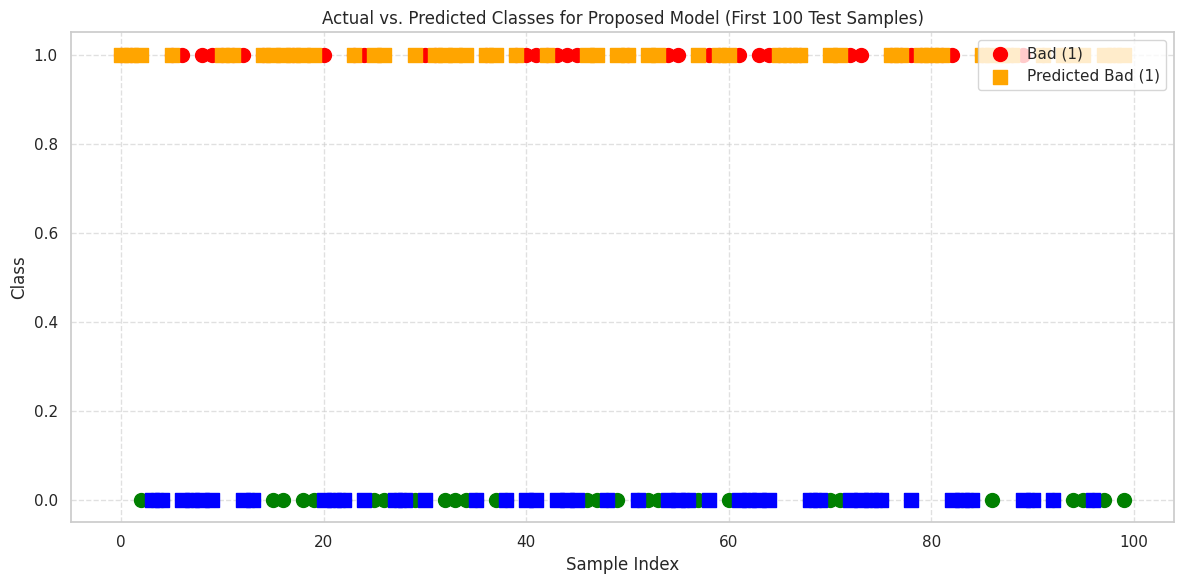

In [52]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Sample data loading and preprocessing (Replace this with actual data)
# data = pd.read_csv('/path/to/your/dataset.csv')
# X = data.drop('target_column', axis=1)  # Features
# y = data['target_column']  # Target variable

# For this example, let's simulate X and y (replace this with actual dataset)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.choice([0, 1], size=1000)  # Binary target variable

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance on the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define and train the LGBM model
lgbm_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=7, random_state=42)
lgbm_classifier.fit(X_train_res, y_train_res)

# Predict on the validation set (for tuning and checking intermediate performance)
y_val_pred = lgbm_classifier.predict(X_val)

# Predict on the test set (final evaluation)
y_test_pred = lgbm_classifier.predict(X_test)

# Get the first 100 actual vs predicted values for the test set
actual_vs_predicted = list(zip(y_test[:100], y_test_pred[:100]))

# Convert to separate lists for plotting
actual_values = [pair[0] for pair in actual_vs_predicted]
predicted_values = [pair[1] for pair in actual_vs_predicted]

# Plot actual vs predicted classes (for the first 100 test samples)
plt.figure(figsize=(12, 6))

# Plot Actual Values
for i in range(len(actual_values)):
    if actual_values[i] == 0:
        plt.scatter(i, actual_values[i], marker='o', color='green', s=100, label='Good (0)' if i == 0 else "")
    else:
        plt.scatter(i, actual_values[i], marker='o', color='red', s=100, label='Bad (1)' if i == 0 else "")

# Plot Predicted Values
for i in range(len(predicted_values)):
    if predicted_values[i] == 0:
        plt.scatter(i, predicted_values[i], marker='s', color='blue', s=100, label='Predicted Good (0)' if i == 0 else "")
    else:
        plt.scatter(i, predicted_values[i], marker='s', color='orange', s=100, label='Predicted Bad (1)' if i == 0 else "")

plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs. Predicted Classes for Proposed Model (First 100 Test Samples)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Improve the layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [5]:
import pandas as pd

# Read the dataset from the specified file path
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2.csv')

# List of columns to analyze
columns_to_analyze = [
    'Age_of_Participants', 'Medical_Expense', 'General_Health', 'Physical_Functioning',
    'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional',
    'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score'
]

# Calculate mean, standard deviation, and min-max range for the specified columns
summary_stats = data[columns_to_analyze].agg(['mean', 'std', 'min', 'max'])

# Display the summary statistics
print(summary_stats)


      Age_of_Participants  Medical_Expense  General_Health  \
mean            19.747191     84410.112360       48.188202   
std              8.019913     70446.076143       16.942853   
min             11.000000       500.000000        0.000000   
max             53.000000    420000.000000       85.000000   

      Physical_Functioning  Role_Physical  Bodily_Pain    Vitality  \
mean             72.471910      51.053371    71.523876   59.438202   
std              27.011981      37.771738    27.565775   19.758232   
min               0.000000       0.000000     0.000000    0.000000   
max             100.000000     100.000000   100.000000  100.000000   

      Mental_Health  Role_Emotional  Social_Functioning  \
mean      63.471910       58.523876           44.241573   
std       18.808203       38.593099           23.332123   
min        4.000000        0.000000            0.000000   
max      100.000000      100.000000          100.000000   

      Physical_Health_Summary  Total_SF_Sc

In [6]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,Female,Single,Nuclear,Secondary school,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,Good
1,18,Male,Single,Nuclear,High School,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,Good
2,13,Female,Single,Nuclear,High School,High school student,Rural,Low income,E-beta-thalassaemia,No,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,Good
3,14,Female,Single,Joint,High School,High school student,Rural,Low income,E-beta-thalassaemia,No,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,Good
4,13,Male,Single,Nuclear,Primary school,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,Good


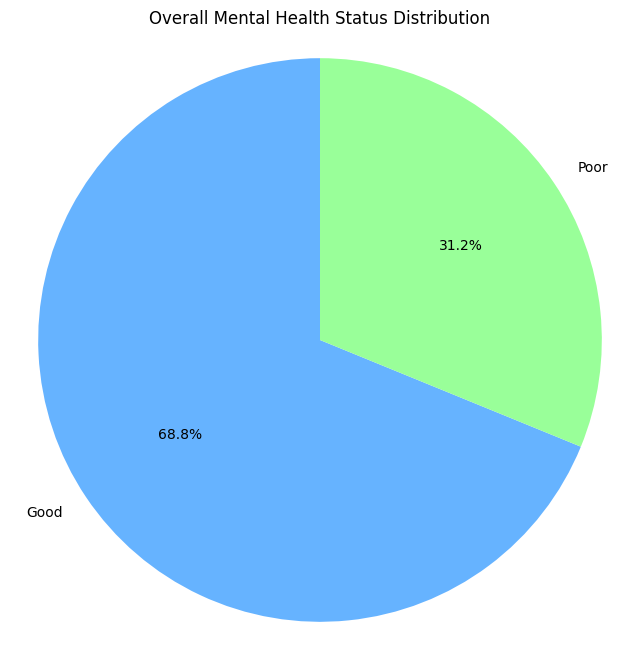

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Group the data by 'Mental_Health_Status' and count occurrences
mental_health_counts = data['Mental_Health_Status'].value_counts()

# Create a pie chart for the distribution of 'Mental_Health_Status'
plt.figure(figsize=(8, 8))
plt.pie(mental_health_counts, labels=mental_health_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Overall Mental Health Status Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Count total males and females
gender_counts = data['Gender'].value_counts()
total_count = len(data)

# Calculate gender percentage
gender_percentage = (gender_counts / total_count) * 100

# Print male & female percentage
print("Gender Distribution in Dataset:")
print(gender_percentage.round(2))

# Count Mental Health Status within each gender
mental_health_gender = data.groupby(['Gender', 'Mental_Health_Status']).size().unstack()

# Calculate percentages within each gender
mental_health_percent = mental_health_gender.div(mental_health_gender.sum(axis=1), axis=0) * 100

# Print the mental health distribution by gender
print("\nMental Health Status Percentage by Gender:")
print(mental_health_percent.round(2))

# Determine which gender has higher good and bad mental health
good_health = mental_health_percent.idxmax(axis=0)[0]  # Assuming first column is "Good"
bad_health = mental_health_percent.idxmax(axis=0)[1]   # Assuming second column is "Bad"

print(f"\n🔹 Gender with Highest 'Good' Mental Health: {good_health}")
print(f"🔹 Gender with Highest 'Bad' Mental Health: {bad_health}")


Gender Distribution in Dataset:
Gender
Male      54.21
Female    45.79
Name: count, dtype: float64

Mental Health Status Percentage by Gender:
Mental_Health_Status   Good   Poor
Gender                            
Female                61.96  38.04
Male                  74.61  25.39

🔹 Gender with Highest 'Good' Mental Health: Male
🔹 Gender with Highest 'Bad' Mental Health: Female


<ipython-input-37-c5fb3f613294>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  good_health = mental_health_percent.idxmax(axis=0)[0]  # Assuming first column is "Good"
<ipython-input-37-c5fb3f613294>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bad_health = mental_health_percent.idxmax(axis=0)[1]   # Assuming second column is "Bad"


In [38]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Define age groups (modify as needed)
bins = [0, 18, 30, 45, 60, 100]  # Age ranges (adjust based on data)
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['Age_Group'] = pd.cut(data['Age_of_Participants'], bins=bins, labels=labels)

# Count Mental Health Status within each age group
mental_health_age = data.groupby(['Age_Group', 'Mental_Health_Status']).size().unstack()

# Calculate percentage within each age group
mental_health_percent = mental_health_age.div(mental_health_age.sum(axis=1), axis=0) * 100

# Print the mental health distribution by age group
print("\nMental Health Status Percentage by Age Group:")
print(mental_health_percent.round(2))

# Determine which age group has the highest good and bad mental health
good_health = mental_health_percent.idxmax(axis=0)[0]  # First column assumed "Good"
bad_health = mental_health_percent.idxmax(axis=0)[1]   # Second column assumed "Bad"

print(f"\n🔹 Age Group with Highest 'Good' Mental Health: {good_health}")
print(f"🔹 Age Group with Highest 'Bad' Mental Health: {bad_health}")



Mental Health Status Percentage by Age Group:
Mental_Health_Status   Good   Poor
Age_Group                         
0-18                  72.17  27.83
19-30                 66.67  33.33
31-45                 55.88  44.12
46-60                 60.00  40.00
61+                     NaN    NaN

🔹 Age Group with Highest 'Good' Mental Health: 0-18
🔹 Age Group with Highest 'Bad' Mental Health: 31-45


<ipython-input-38-d0477079a0bc>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_age = data.groupby(['Age_Group', 'Mental_Health_Status']).size().unstack()
<ipython-input-38-d0477079a0bc>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  good_health = mental_health_percent.idxmax(axis=0)[0]  # First column assumed "Good"
<ipython-input-38-d0477079a0bc>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bad_health =

In [39]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

### **1️⃣ Male & Female Percentage in Dataset**
gender_counts = data['Gender'].value_counts(normalize=True) * 100  # Convert to percentage
print("\n🔹 Gender Distribution in Dataset:")
print(gender_counts.round(2))  # Round to 2 decimal places

### **2️⃣ Mental Health Status by Gender**
mental_health_gender = data.groupby('Gender')['Mental_Health_Status'].value_counts(normalize=True).unstack() * 100
print("\n🔹 Mental Health Status Percentage by Gender:")
print(mental_health_gender.round(2))

# Determine which gender has the highest good and bad mental health
good_health_gender = mental_health_gender.idxmax(axis=0)[0]  # First column assumed "Good"
bad_health_gender = mental_health_gender.idxmax(axis=0)[1]   # Second column assumed "Bad"

print(f"\n✅ Gender with Best Mental Health: {good_health_gender}")
print(f"❌ Gender with Worst Mental Health: {bad_health_gender}")

### **3️⃣ Mental Health Status by Age Group**
# Define age groups (modify as needed)
bins = [0, 18, 30, 45, 60, 100]  # Age ranges (adjust based on dataset)
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['Age_Group'] = pd.cut(data['Age_of_Participants'], bins=bins, labels=labels)

# Count Mental Health Status within each age group
mental_health_age = data.groupby('Age_Group')['Mental_Health_Status'].value_counts(normalize=True).unstack() * 100
print("\n🔹 Mental Health Status Percentage by Age Group:")
print(mental_health_age.round(2))

# Determine which age group has the highest good and bad mental health
good_health_age = mental_health_age.idxmax(axis=0)[0]  # First column assumed "Good"
bad_health_age = mental_health_age.idxmax(axis=0)[1]   # Second column assumed "Bad"

print(f"\n✅ Age Group with Best Mental Health: {good_health_age}")
print(f"❌ Age Group with Worst Mental Health: {bad_health_age}")



🔹 Gender Distribution in Dataset:
Gender
Male      54.21
Female    45.79
Name: proportion, dtype: float64

🔹 Mental Health Status Percentage by Gender:
Mental_Health_Status   Good   Poor
Gender                            
Female                61.96  38.04
Male                  74.61  25.39

✅ Gender with Best Mental Health: Male
❌ Gender with Worst Mental Health: Female

🔹 Mental Health Status Percentage by Age Group:
Mental_Health_Status   Good   Poor
Age_Group                         
0-18                  72.17  27.83
19-30                 66.67  33.33
31-45                 55.88  44.12
46-60                 60.00  40.00
61+                    0.00   0.00

✅ Age Group with Best Mental Health: 0-18
❌ Age Group with Worst Mental Health: 31-45


<ipython-input-39-0ee780fac17f>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  good_health_gender = mental_health_gender.idxmax(axis=0)[0]  # First column assumed "Good"
<ipython-input-39-0ee780fac17f>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bad_health_gender = mental_health_gender.idxmax(axis=0)[1]   # Second column assumed "Bad"
<ipython-input-39-0ee780fac17f>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ment

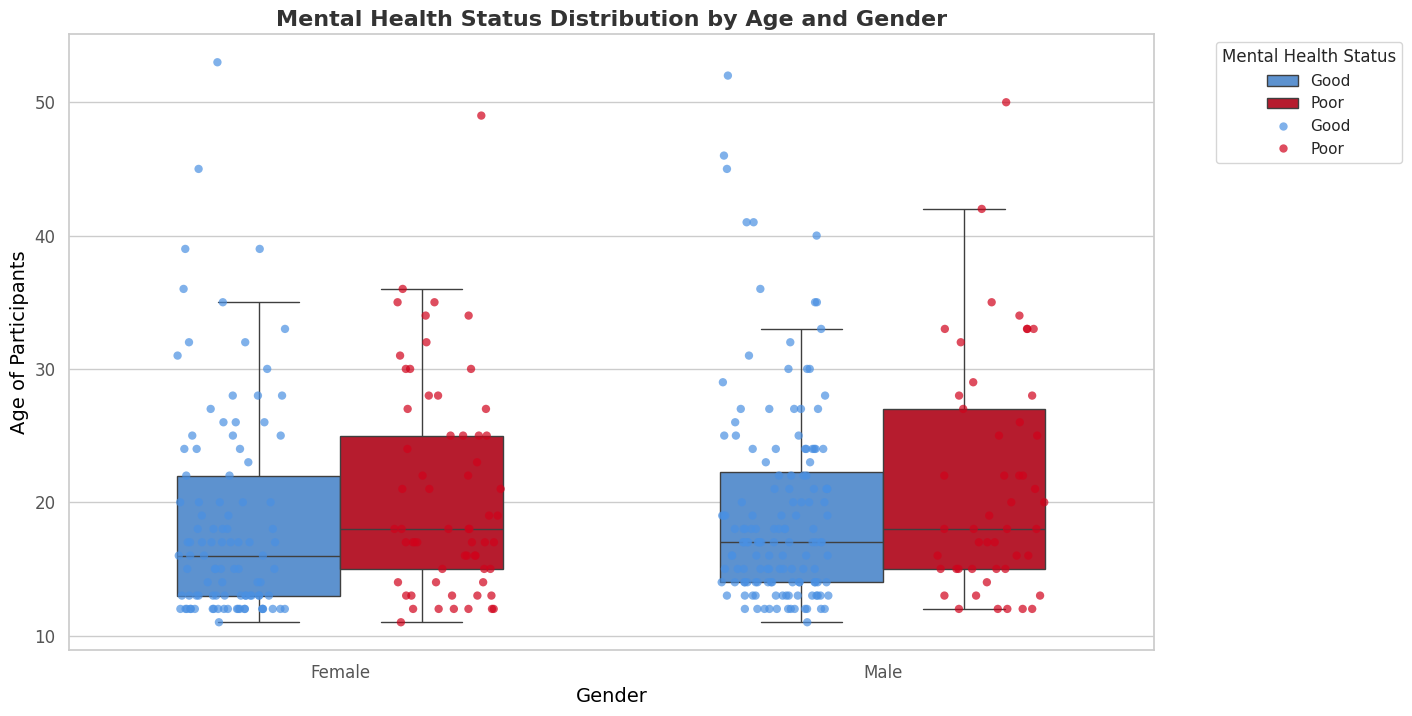

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set an elegant journal-style theme
sns.set_style("whitegrid")

# Define a professional, eye-relaxing color palette
custom_palette = ["#4A90E2", "#D0021B"]

# Create a figure
plt.figure(figsize=(14, 8))

# Box plot for Age distribution by Gender
sns.boxplot(x="Gender", y="Age_of_Participants", hue="Mental_Health_Status",
            data=data, palette=custom_palette, width=0.6, fliersize=0)

# Strip plot to show individual data points
sns.stripplot(x="Gender", y="Age_of_Participants", hue="Mental_Health_Status",
              data=data, palette=custom_palette, dodge=True, jitter=0.2, alpha=0.7, size=6)

# Improve the readability with clean labels
plt.title("Mental Health Status Distribution by Age and Gender",
          fontsize=16, weight='bold', color="#333333")
plt.xlabel("Gender", fontsize=14, color="black")
plt.ylabel("Age of Participants", fontsize=14, color="black")
plt.xticks(fontsize=12, color="#555555")
plt.yticks(fontsize=12, color="#555555")

# Improve legend placement
plt.legend(title="Mental Health Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save as a **600 DPI high-quality PDF**
plt.savefig('/content/drive/MyDrive/Thalassemia/Age_Gender_vs_Mental_Health.pdf', dpi=600, format='pdf', bbox_inches="tight")

# Show the refined plot
plt.show()


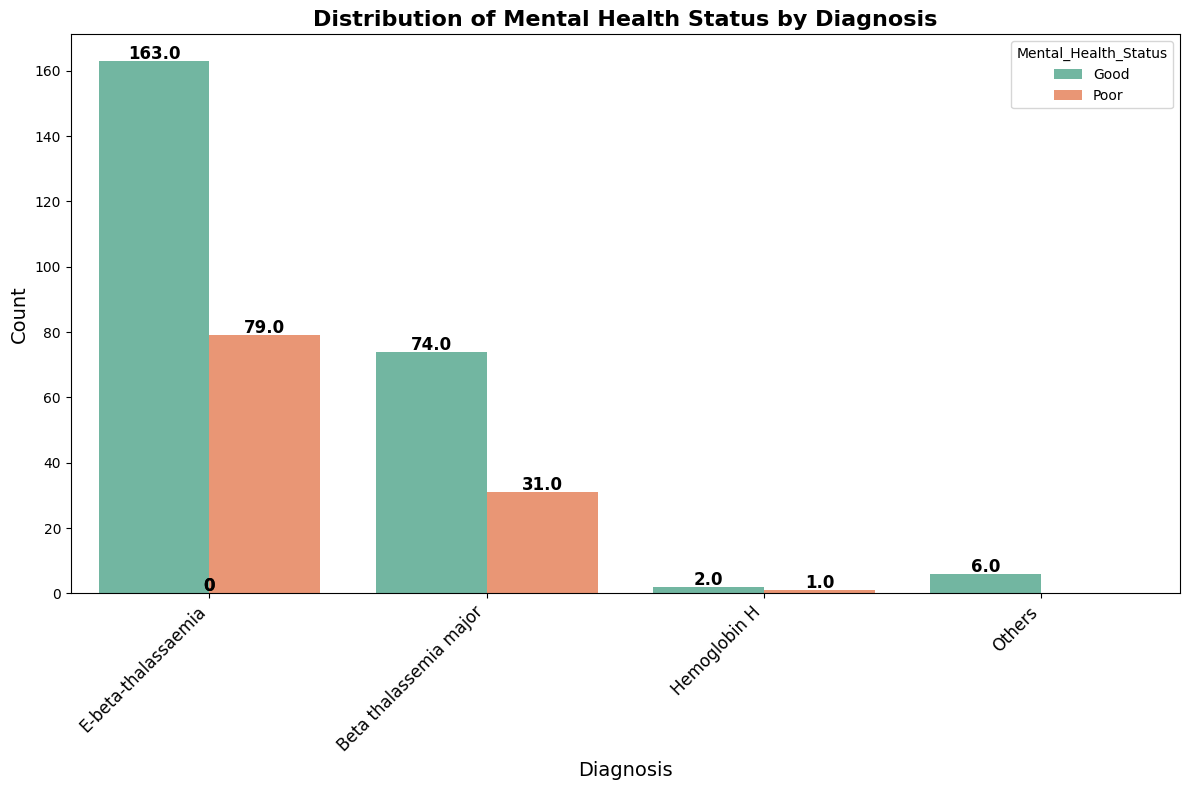

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set a nicer color palette
sns.set_palette('Set2')  # This is a more refined color palette

# Create a countplot for 'Mental_Health_Status' vs 'Diagnosis'
plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
ax = sns.countplot(x='Diagnosis', hue='Mental_Health_Status', data=data)

# Customize the plot with more readable labels and title
plt.title('Distribution of Mental Health Status by Diagnosis', fontsize=16, weight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability and adjust the position
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

# Adjust layout for better spacing and readability
plt.tight_layout()

# Show the plot
plt.show()


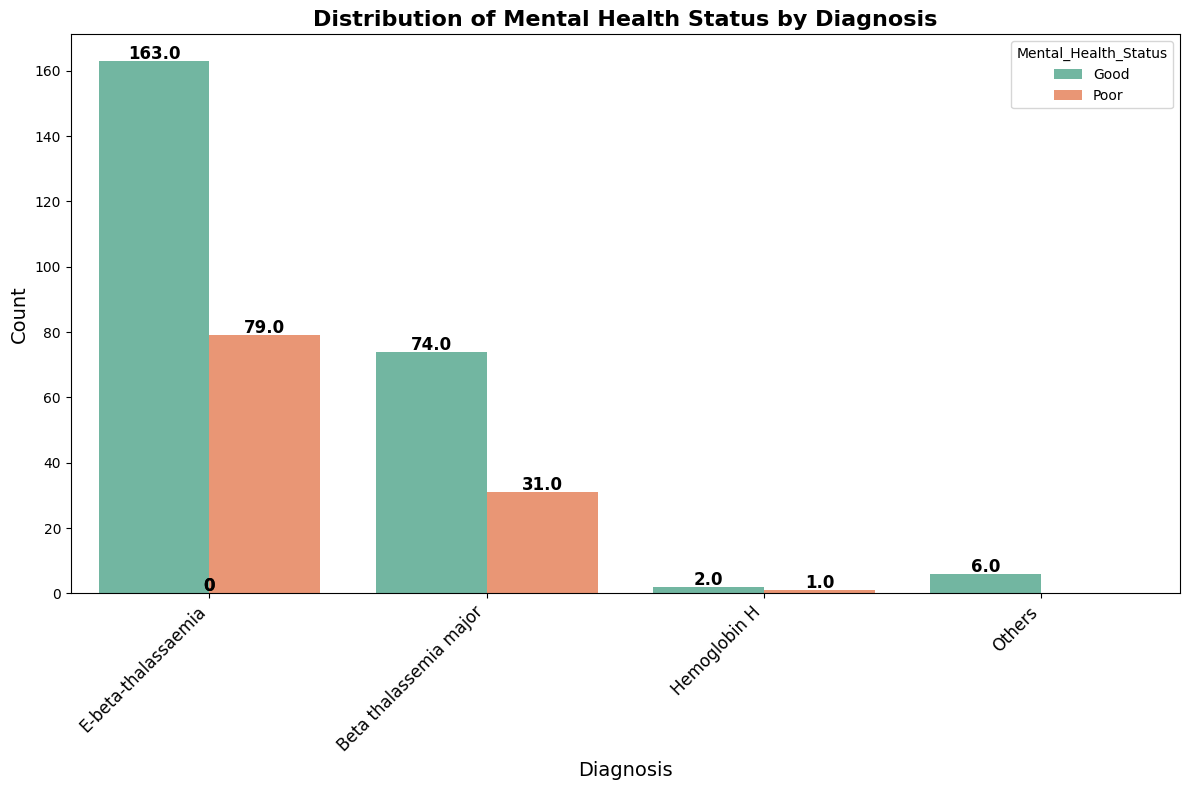

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set a nicer color palette
sns.set_palette('Set2')  # This is a more refined color palette

# Create a countplot for 'Mental_Health_Status' vs 'Diagnosis'
plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
ax = sns.countplot(x='Diagnosis', hue='Mental_Health_Status', data=data)

# Customize the plot with more readable labels and title
plt.title('Distribution of Mental Health Status by Diagnosis', fontsize=16, weight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability and adjust the position
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

# Adjust layout for better spacing and readability
plt.tight_layout()

# Save the plot as a PDF with 600 DPI
plt.savefig('/content/drive/MyDrive/Thalassemia/mental_health_status_by_diagnosis.pdf', format='pdf', dpi=600)

# Show the plot
plt.show()


<ipython-input-34-cc56d3a5b0d5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Mental_Health_Status', y='Medical_Expense', data=data,
<ipython-input-34-cc56d3a5b0d5>:13: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  ax = sns.violinplot(x='Mental_Health_Status', y='Medical_Expense', data=data,
<ipython-input-34-cc56d3a5b0d5>:13: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(x='Mental_Health_Status', y='Medical_Expense', data=data,


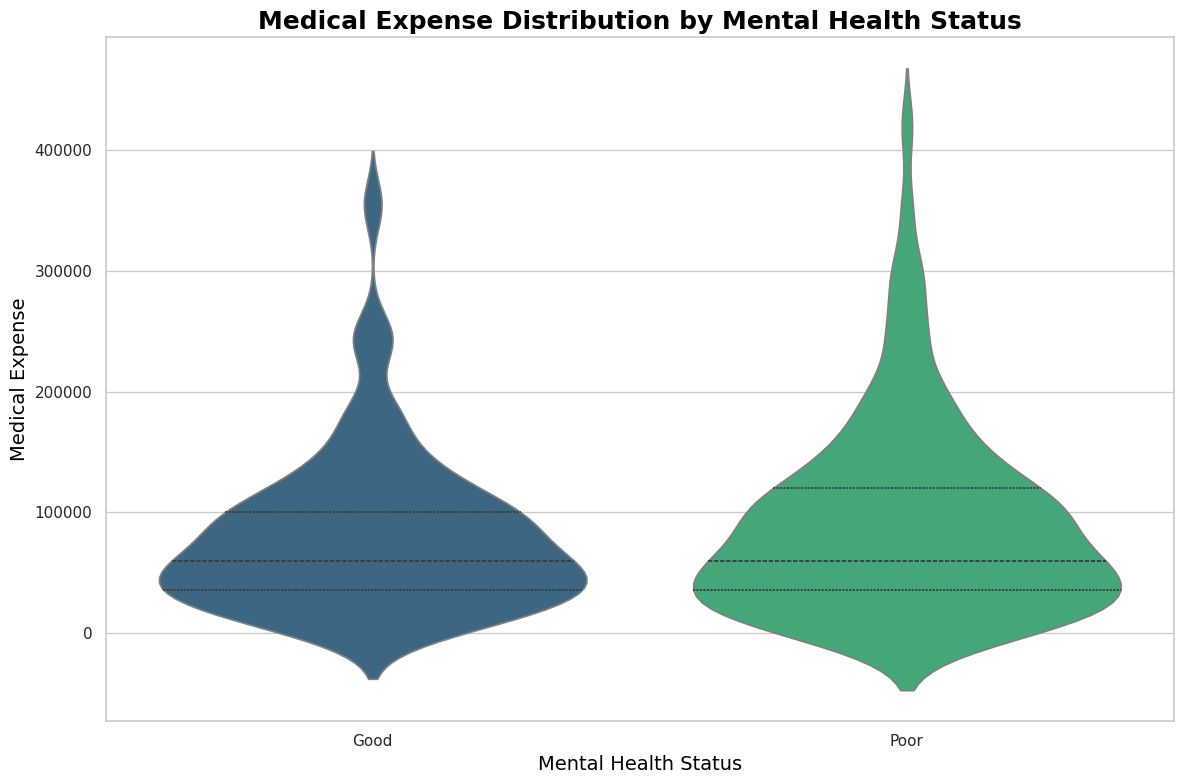

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set a custom color palette
sns.set_palette("viridis")  # Using a more attractive and professional color palette

# Create a violin plot for 'Mental_Health_Status' vs 'Medical_Expense'
plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
ax = sns.violinplot(x='Mental_Health_Status', y='Medical_Expense', data=data,
                    inner="quart", scale="area", bw=0.3, palette='viridis')

# Customize the plot with more readable labels and title
plt.title('Medical Expense Distribution by Mental Health Status', fontsize=18, weight='bold', color='black')
plt.xlabel('Mental Health Status', fontsize=14)
plt.ylabel('Medical Expense (in currency)', fontsize=14)

# Set axis label colors to match the aesthetic
plt.gca().set_xlabel('Mental Health Status', color='black', fontsize=14)
plt.gca().set_ylabel('Medical Expense', color='black', fontsize=14)

# Improve grid and background style
sns.set(style="whitegrid")

# Add a horizontal line for the median of each category
for i in ax.collections:
    i.set_edgecolor('gray')

# Adjust layout for better spacing and readability
plt.tight_layout()

# Save the plot as a high-quality PDF (600 DPI)
plt.savefig('/content/drive/MyDrive/Thalassemia/mental_health_status_vs_medical_expense_violin_optimized.pdf', format='pdf', dpi=600)

# Show the plot
plt.show()


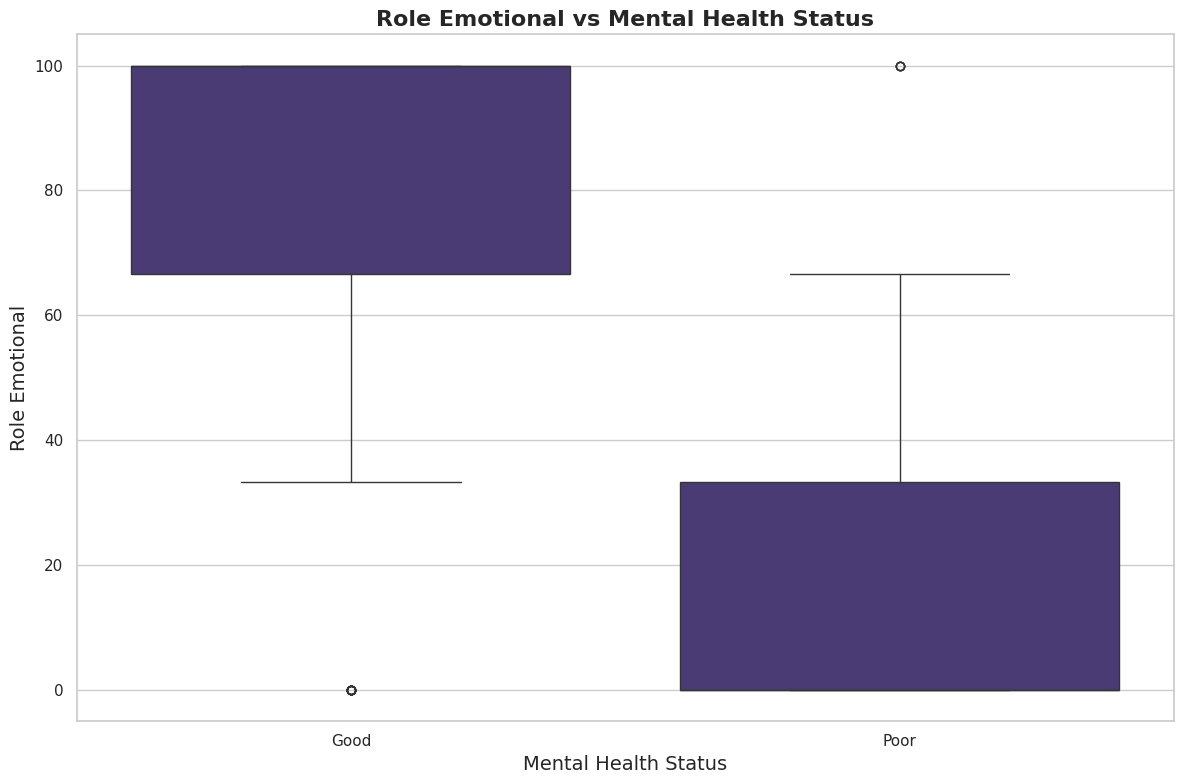

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set the color palette for better visualization
sns.set_palette("viridis")

# Create a boxplot for 'Mental_Health_Status' vs 'Role_Emotional'
plt.figure(figsize=(12, 8))  # Increase the figure size for better clarity
sns.boxplot(x='Mental_Health_Status', y='Role_Emotional', data=data)

# Customize the plot with more readable labels and title
plt.title('Role Emotional vs Mental Health Status', fontsize=16, weight='bold')
plt.xlabel('Mental Health Status', fontsize=14)
plt.ylabel('Role Emotional', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


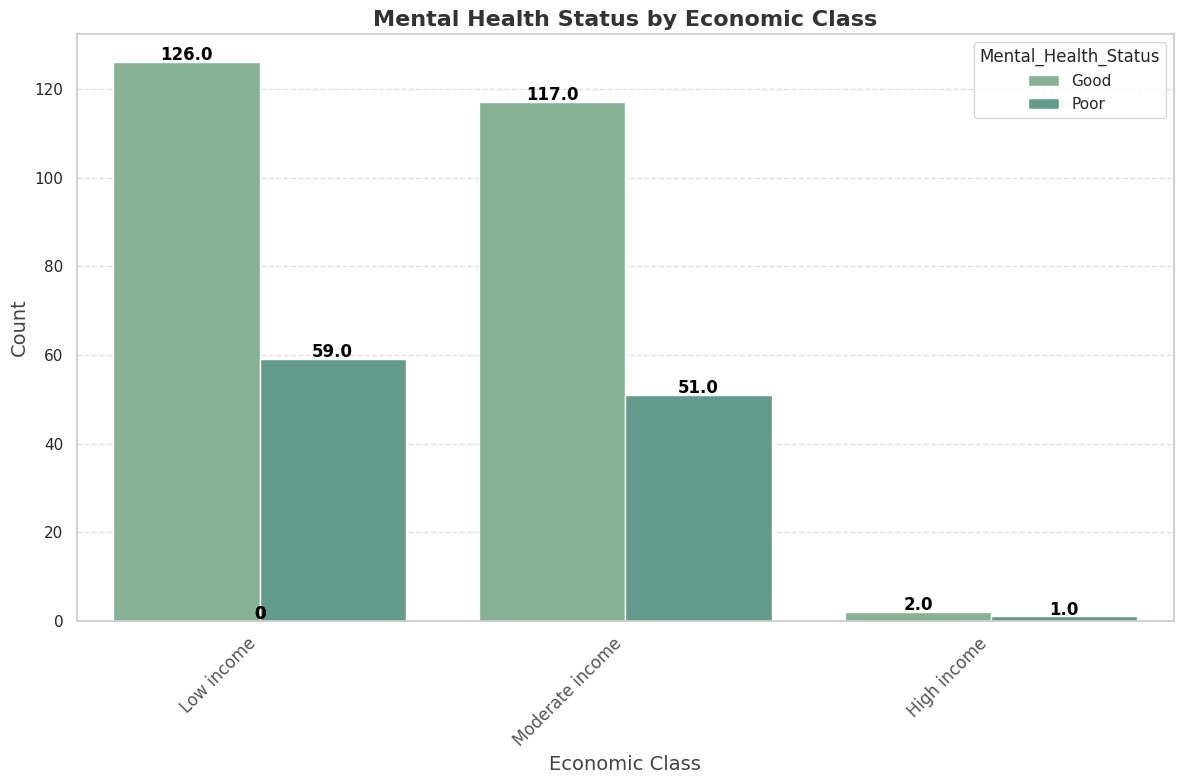

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set a smooth, eye-relaxing color palette
custom_palette = sns.color_palette("crest", as_cmap=False)  # 'crest' has a soft, professional look

# Apply the color palette
sns.set_palette(custom_palette)

# Create a countplot for 'Mental_Health_Status' vs 'Economic_Class'
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Economic_Class', hue='Mental_Health_Status', data=data)

# Customize the plot with more readable labels and title
plt.title('Mental Health Status by Economic Class', fontsize=16, weight='bold', color="#333333")  # Dark gray for title
plt.xlabel('Economic Class', fontsize=14, color="#444444")
plt.ylabel('Count', fontsize=14, color="#444444")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, color="#555555")

# Display count values on the bars with subtle annotation
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

# Adjust layout for better spacing and readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Subtle grid for better readability
plt.tight_layout()

# Save the plot as a high-resolution PDF with 600 DPI
plt.savefig('/content/drive/MyDrive/Thalassemia/Mental_Health_by_Economic_Class.pdf', dpi=600, format='pdf')

# Show the plot
plt.show()


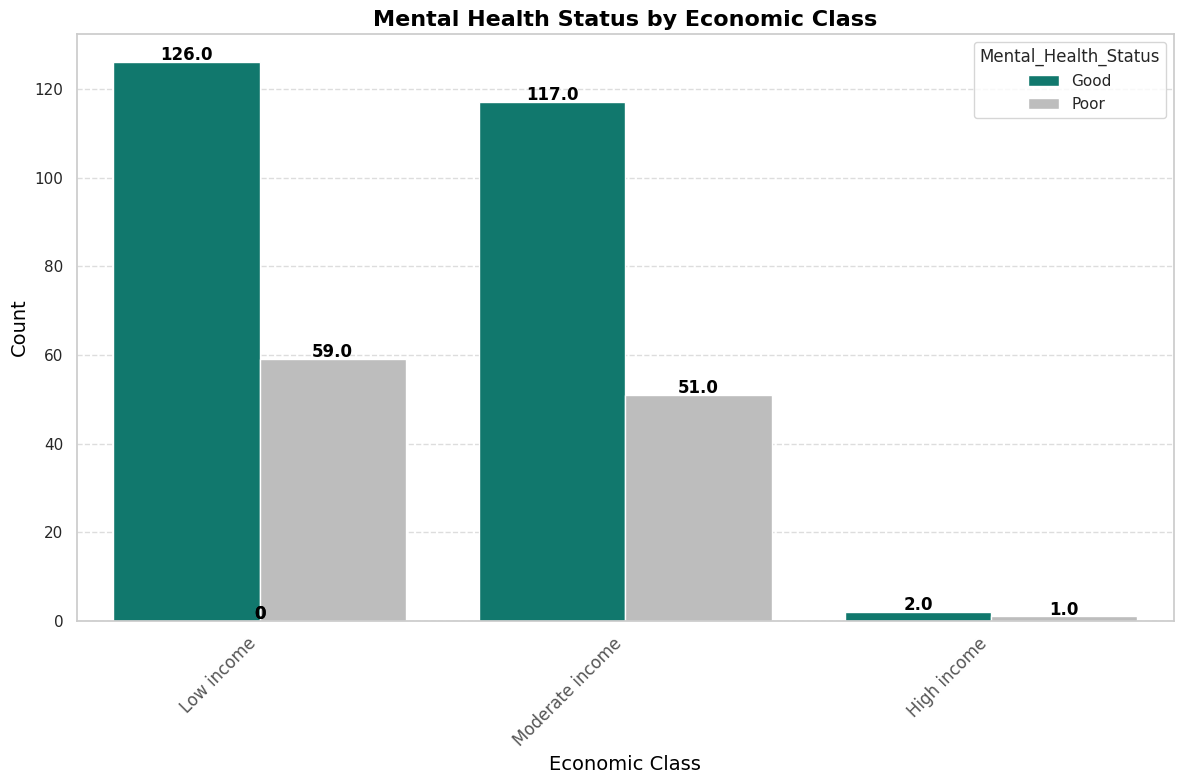

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Define custom colors for better visualization
custom_palette = ["#00897b", "#bdbdbd"]  # Deep teal and soft gray

# Apply the color palette
sns.set_palette(custom_palette)

# Create a countplot for 'Mental_Health_Status' vs 'Economic_Class'
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Economic_Class', hue='Mental_Health_Status', data=data)

# Customize the plot with more readable labels and title
plt.title('Mental Health Status by Economic Class', fontsize=16, weight='bold', color="black")  # Dark gray title
plt.xlabel('Economic Class', fontsize=14, color="black")
plt.ylabel('Count', fontsize=14, color="black")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, color="#555555")

# Display count values on the bars with a better font style
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

# Add a subtle grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5, color="#bdbdbd")

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a high-resolution PDF with 600 DPI
plt.savefig('/content/drive/MyDrive/Thalassemia/Mental_Health_by_Economic_Class.pdf', dpi=600, format='pdf')

# Show the plot
plt.show()


<ipython-input-32-3a152756bc9d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Mental_Health_Status", y="Physical_Functioning", data=data,
<ipython-input-32-3a152756bc9d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Mental_Health_Status", y="Physical_Functioning", data=data,


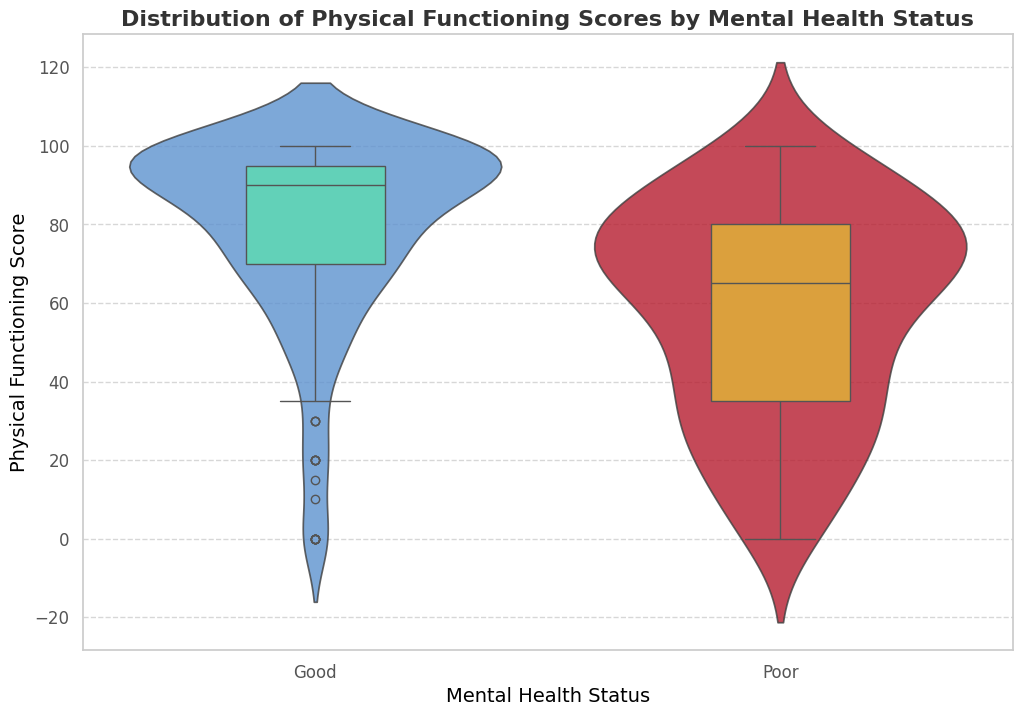

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Set an elegant journal-style theme
sns.set_style("whitegrid")

# Define a professional, eye-relaxing color palette
custom_palette = ["#4A90E2", "#D0021B"]  # Soft blue & deep red

# Create a figure
plt.figure(figsize=(12, 8))

# Violin plot with box plot overlay for enhanced visibility
sns.violinplot(x="Mental_Health_Status", y="Physical_Functioning", data=data,
               inner=None, palette=custom_palette, alpha=0.8)  # Violin for distribution
sns.boxplot(x="Mental_Health_Status", y="Physical_Functioning", data=data,
            width=0.3, palette=["#50E3C2", "#F5A623"])  # Boxplot overlay with distinct colors

# Improve the readability with clean labels
plt.title("Distribution of Physical Functioning Scores by Mental Health Status",
          fontsize=16, weight='bold', color="#333333")
plt.xlabel("Mental Health Status", fontsize=14, color="black")
plt.ylabel("Physical Functioning Score", fontsize=14, color="black")
plt.xticks(fontsize=12, color="#555555")
plt.yticks(fontsize=12, color="#555555")

# Add a subtle grid for better perception
plt.grid(axis='y', linestyle='--', alpha=0.6, color="#bdbdbd")

# Save as a **600 DPI high-quality PDF**
plt.savefig('/content/drive/MyDrive/Thalassemia/Physical_Functioning_by_Mental_Health.pdf', dpi=600, format='pdf')

# Show the refined plot
plt.show()
